In [217]:
############################################
# science lineplot
import functools
from matplotlib.rcsetup import cycler
import scienceplots
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns


standard_colors = [
    c["color"] for c in plt.style.library["std-colors"]["axes.prop_cycle"]
]
crest_colors = list(sns.color_palette("crest", n_colors=4))
flare_colors = list(sns.color_palette("flare", n_colors=4))
circular_colors = list(sns.color_palette("husl", 8))


plt.style.library["science"]["axes.prop_cycle"] = cycler(color=circular_colors)
plt.style.use("science")
# figure size in inches, use golden ratio
matplotlib.rcParams['figure.figsize'] = (4.85, 3) 
# default figure.dpi: 200


def plot(fn, *fn_args,  title=None, legend=None, xlabel=None, ylabel=None, **fn_kwargs,):    
    # plt.plot(*line2_xy)
    ret = fn(*fn_args, **fn_kwargs)

    if legend is not None:
        plt.legend() if legend is True else plt.legend(legend)

    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    return ret

def confidence(x, y, y_err, **kwargs):
    plt.plot(x, y, **kwargs)
    plt.fill_between(x, y + y_err, y - y_err, alpha=.2, label='_')

########################################3

plt.style.library["science"]

{'axes.linewidth': 0.5,
 'axes.prop_cycle': cycler('color', [(0.9677975592919913, 0.44127456009157356, 0.5358103155058701), (0.8087954113106306, 0.5634700050056693, 0.19502642696727285), (0.5920891529639701, 0.6418467016378244, 0.1935069134991043), (0.19783576093349015, 0.6955516966063037, 0.3995301037444499), (0.21044753832183283, 0.6773105080456748, 0.6433941168468681), (0.22335772267769388, 0.6565792317435265, 0.8171355503265633), (0.6423044349219739, 0.5497680051256467, 0.9582651433656727), (0.9603888539940703, 0.3814317878772117, 0.8683117650835491)]),
 'figure.figsize': [3.5, 2.625],
 'font.family': ['serif'],
 'grid.linewidth': 0.5,
 'legend.frameon': False,
 'lines.linewidth': 1.0,
 'mathtext.fontset': 'dejavuserif',
 'savefig.bbox': 'tight',
 'savefig.pad_inches': 0.05,
 'text.latex.preamble': '\\usepackage{amsmath} \\usepackage{amssymb}',
 'text.usetex': True,
 'xtick.direction': 'in',
 'xtick.major.size': 3.0,
 'xtick.major.width': 0.5,
 'xtick.minor.size': 1.5,
 'xtick.mino

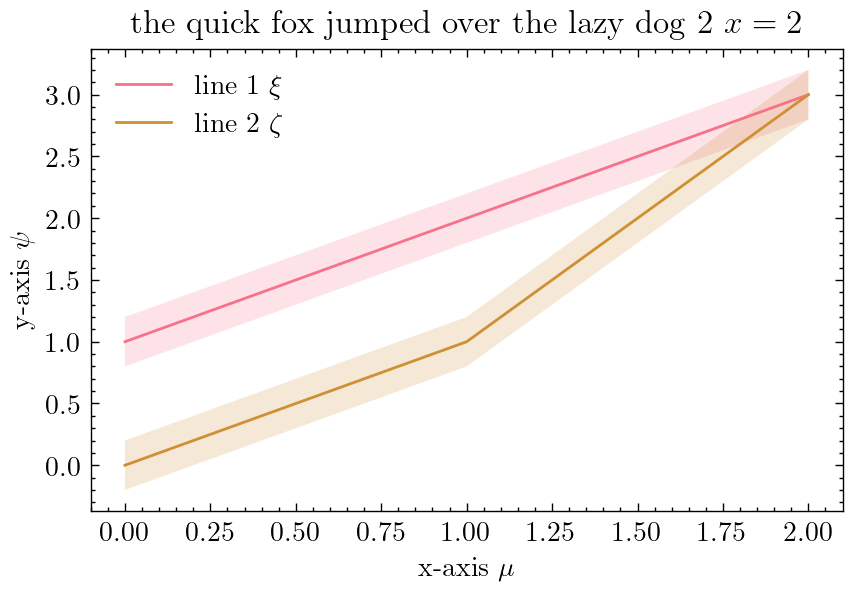

In [220]:
import numpy as np

line1_x, line1_y = ([0, 1, 2], np.array([1, 2, 3]))
line2_x, line2_y = ([0, 1, 2], np.array([0, 1, 3]))

plot(confidence, line1_x, line1_y, y_err=0.2, label=r"line 1 $\xi$")

plot(confidence,
    line2_x, line2_y, .2,
    title="the  quick fox jumped over the lazy dog 2 $x = 2$",
    label=r"line 2 $\zeta$",
    legend=True,
    xlabel="x-axis $\mu$",
    ylabel="y-axis $\psi$"
)

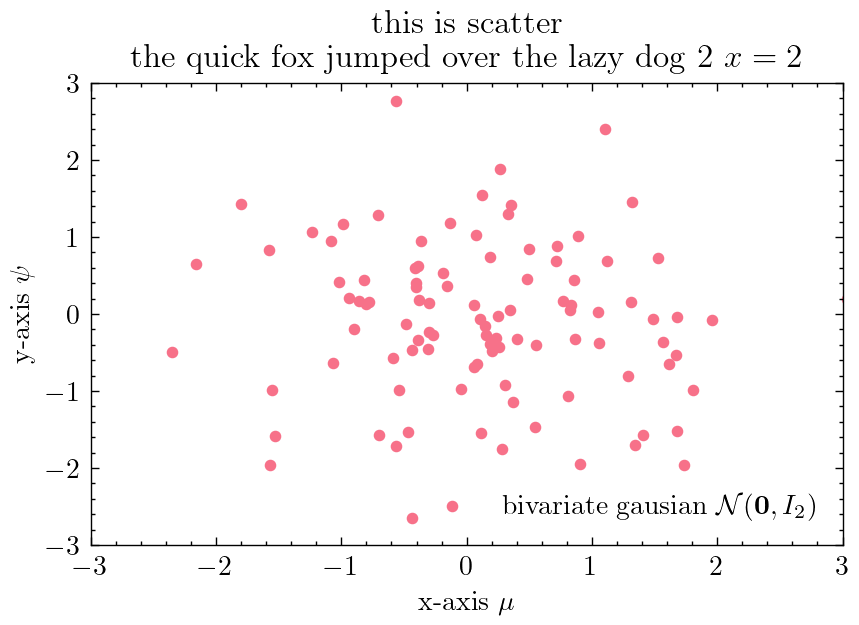

In [241]:
xy = np.random.randn(2, 100)

plot(
    plt.scatter,
    *xy,
    title="this is scatter \n the quick fox jumped over the lazy dog 2 $x = 2$",
    legend=["bivariate gausian $\mathcal{N}(\mathbf{0}, I_2)$"],
    xlabel="x-axis $\mu$",
    ylabel="y-axis $\psi$",
    s=10,
)
plt.ylim(-3, 3)
plt.xlim(-3, 3)
plt.show()

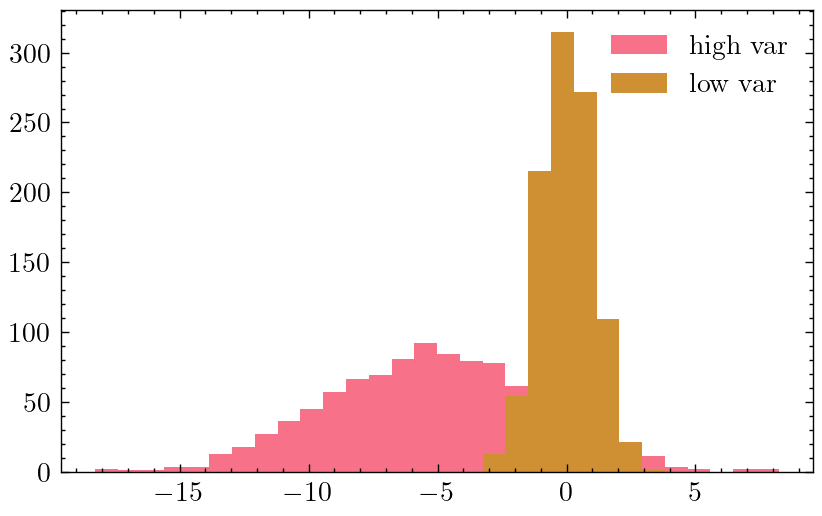

In [100]:
import numpy as np
data = np.random.normal(0, 1, 1000)
more_data = np.random.normal(-5, 4, 1000)



num_in_bins, bins, patches = plot(plt.hist, more_data, bins=30)
plot(plt.hist, data, bins=bins, legend=["high var", "low var"])
plt.show()


<ErrorbarContainer object of 3 artists>

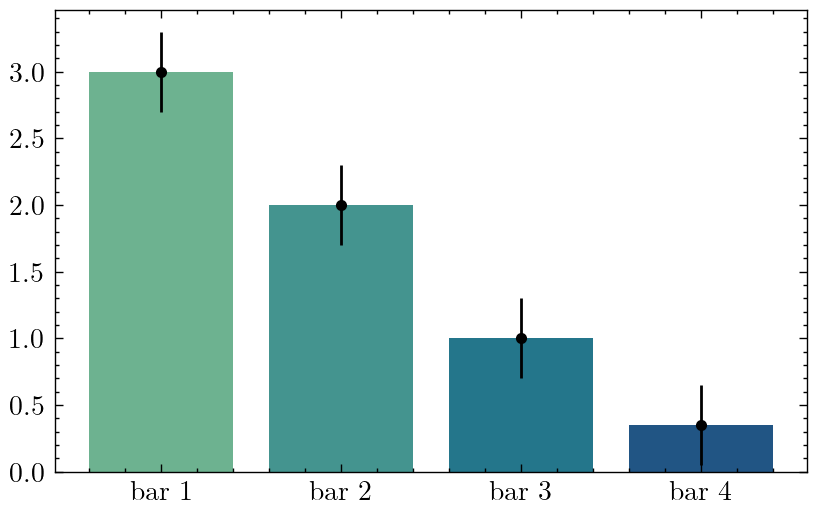

In [103]:
xy = ["bar 1", "bar 2", "bar 3", "bar 4"], [3, 2, 1, 0.35]
# bar_container = plot(plt.bar, *xy, color=flare_colors)
# bar_container = plot(plt.bar, *xy, color=circular_colors)
bar_container = plot(plt.bar, *xy, color=crest_colors)
# plt.bar_label(bar_container, labels=["bar 1", "bar 2", "bar 3", "bar 4"], label_type="center")
plt.errorbar(*xy, [0.3, 0.3, 0.3, 0.3], fmt=".", color="Black")

In [104]:
import seaborn as sns
penguins = sns.load_dataset("penguins")
penguins


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


<AxesSubplot:xlabel='Flipper Length (mm)', ylabel='Density'>

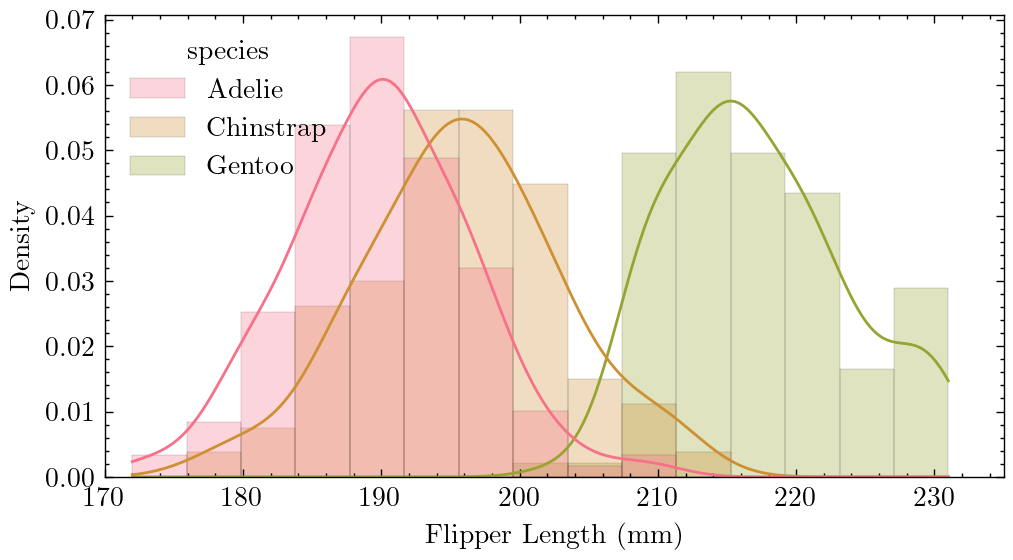

In [173]:
penguins["Flipper Length (mm)"] = penguins["flipper_length_mm"]
plt.figure(figsize=(5.8, 3))
plt.xlim(170, 235)
sns.histplot(
    data=penguins,
    x="Flipper Length (mm)",
    hue="species",
    # bins=80,
    bins=15,
    linewidth=0.05,
    alpha=0.3,
    kde=True,
    common_norm=False,
    stat="density",
)

<AxesSubplot:xlabel='Flipper Length (mm)', ylabel='Density'>

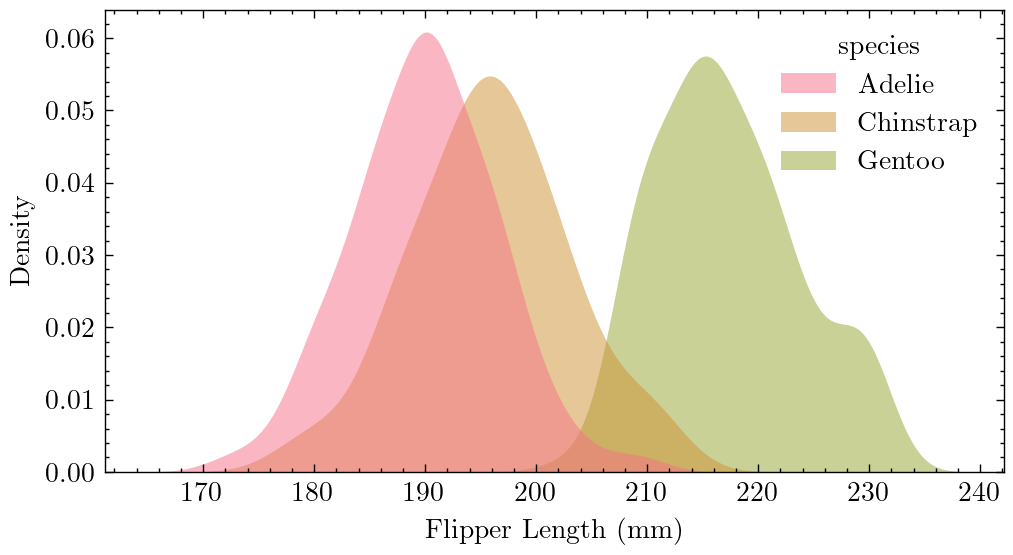

In [174]:
plt.figure(figsize=(5.8, 3))
sns.kdeplot(
    data=penguins,
    x="Flipper Length (mm)",
    hue="species",
    fill=True,
    common_norm=False,
    alpha=0.5,
    linewidth=0,
)

In [121]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


<AxesSubplot:xlabel='total_bill', ylabel='Density'>

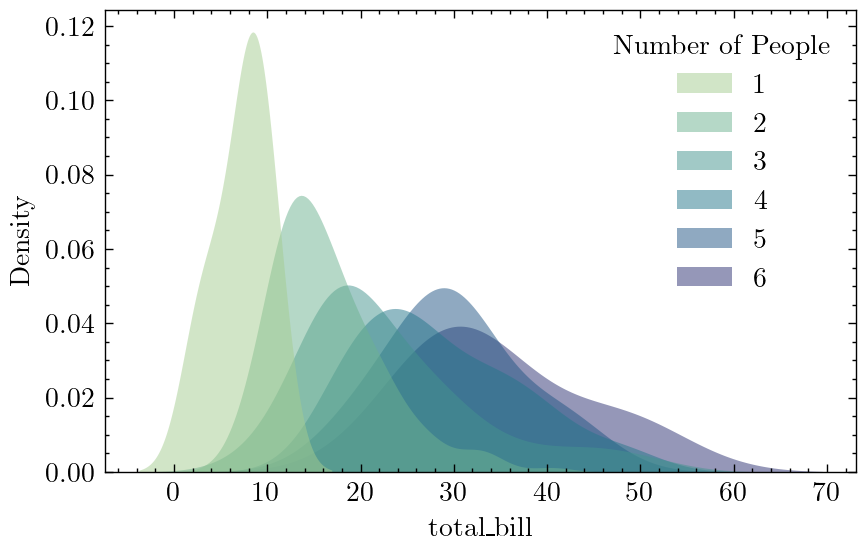

In [122]:
tips['Number of People'] = tips['size']

sns.kdeplot(
    data=tips,
    x="total_bill",
    hue="Number of People",
    fill=True,
    common_norm=False,
    palette="crest",
    alpha=0.5,
    linewidth=0,
)

,total_bill,tip,sex,smoker,day,time,size,Number of People
0,16.99,1.01,Female,No,Sun,Dinner,2,2
3,23.68,3.31,Male,No,Sun,Dinner,2,2
6,8.77,2.00,Male,No,Sun,Dinner,2,2
8,15.04,1.96,Male,No,Sun,Dinner,2,2
9,14.78,3.23,Male,No,Sun,Dinner,2,2
...,...,...,...,...,...,...,...,...
237,32.83,1.17,Male,Yes,Sat,Dinner,2,2
240,27.18,2.00,Female,Yes,Sat,Dinner,2,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2,2
242,17.82,1.75,Male,No,Sat,Dinner,2,2


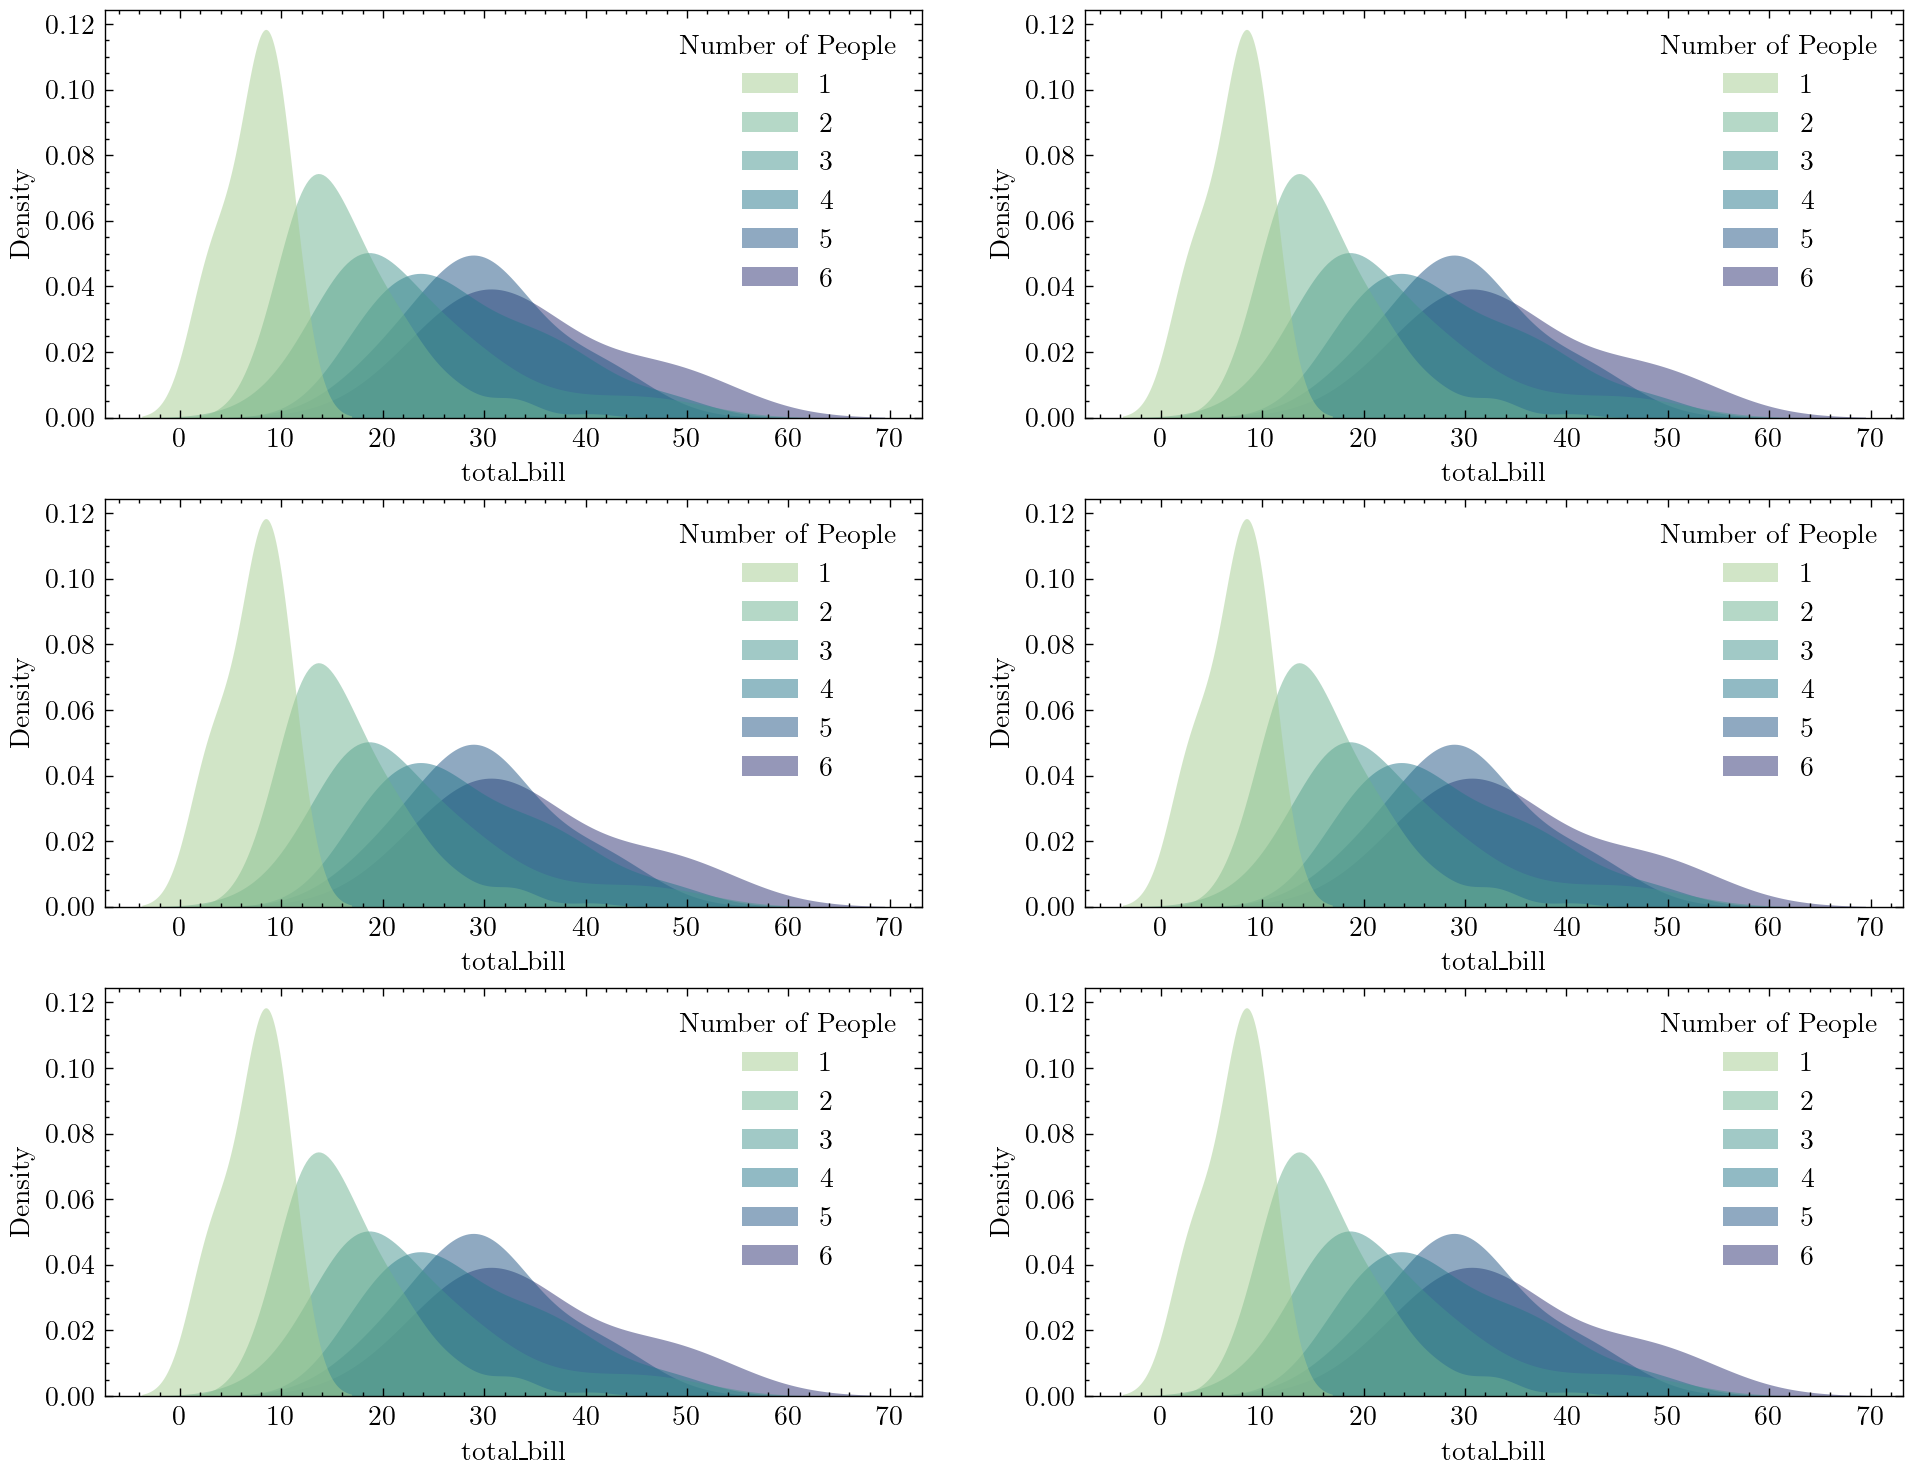

In [260]:
plt.figure(figsize=(5.8*2, 3*3))
for i in range(1, 7):
    plt.subplot(3, 2, i)  # row, col, index
    sns.kdeplot(
        data=tips,
        x="total_bill",
        hue="Number of People",
        fill=True,
        common_norm=False,
        palette="crest",
        alpha=0.5,
        linewidth=0,
    )

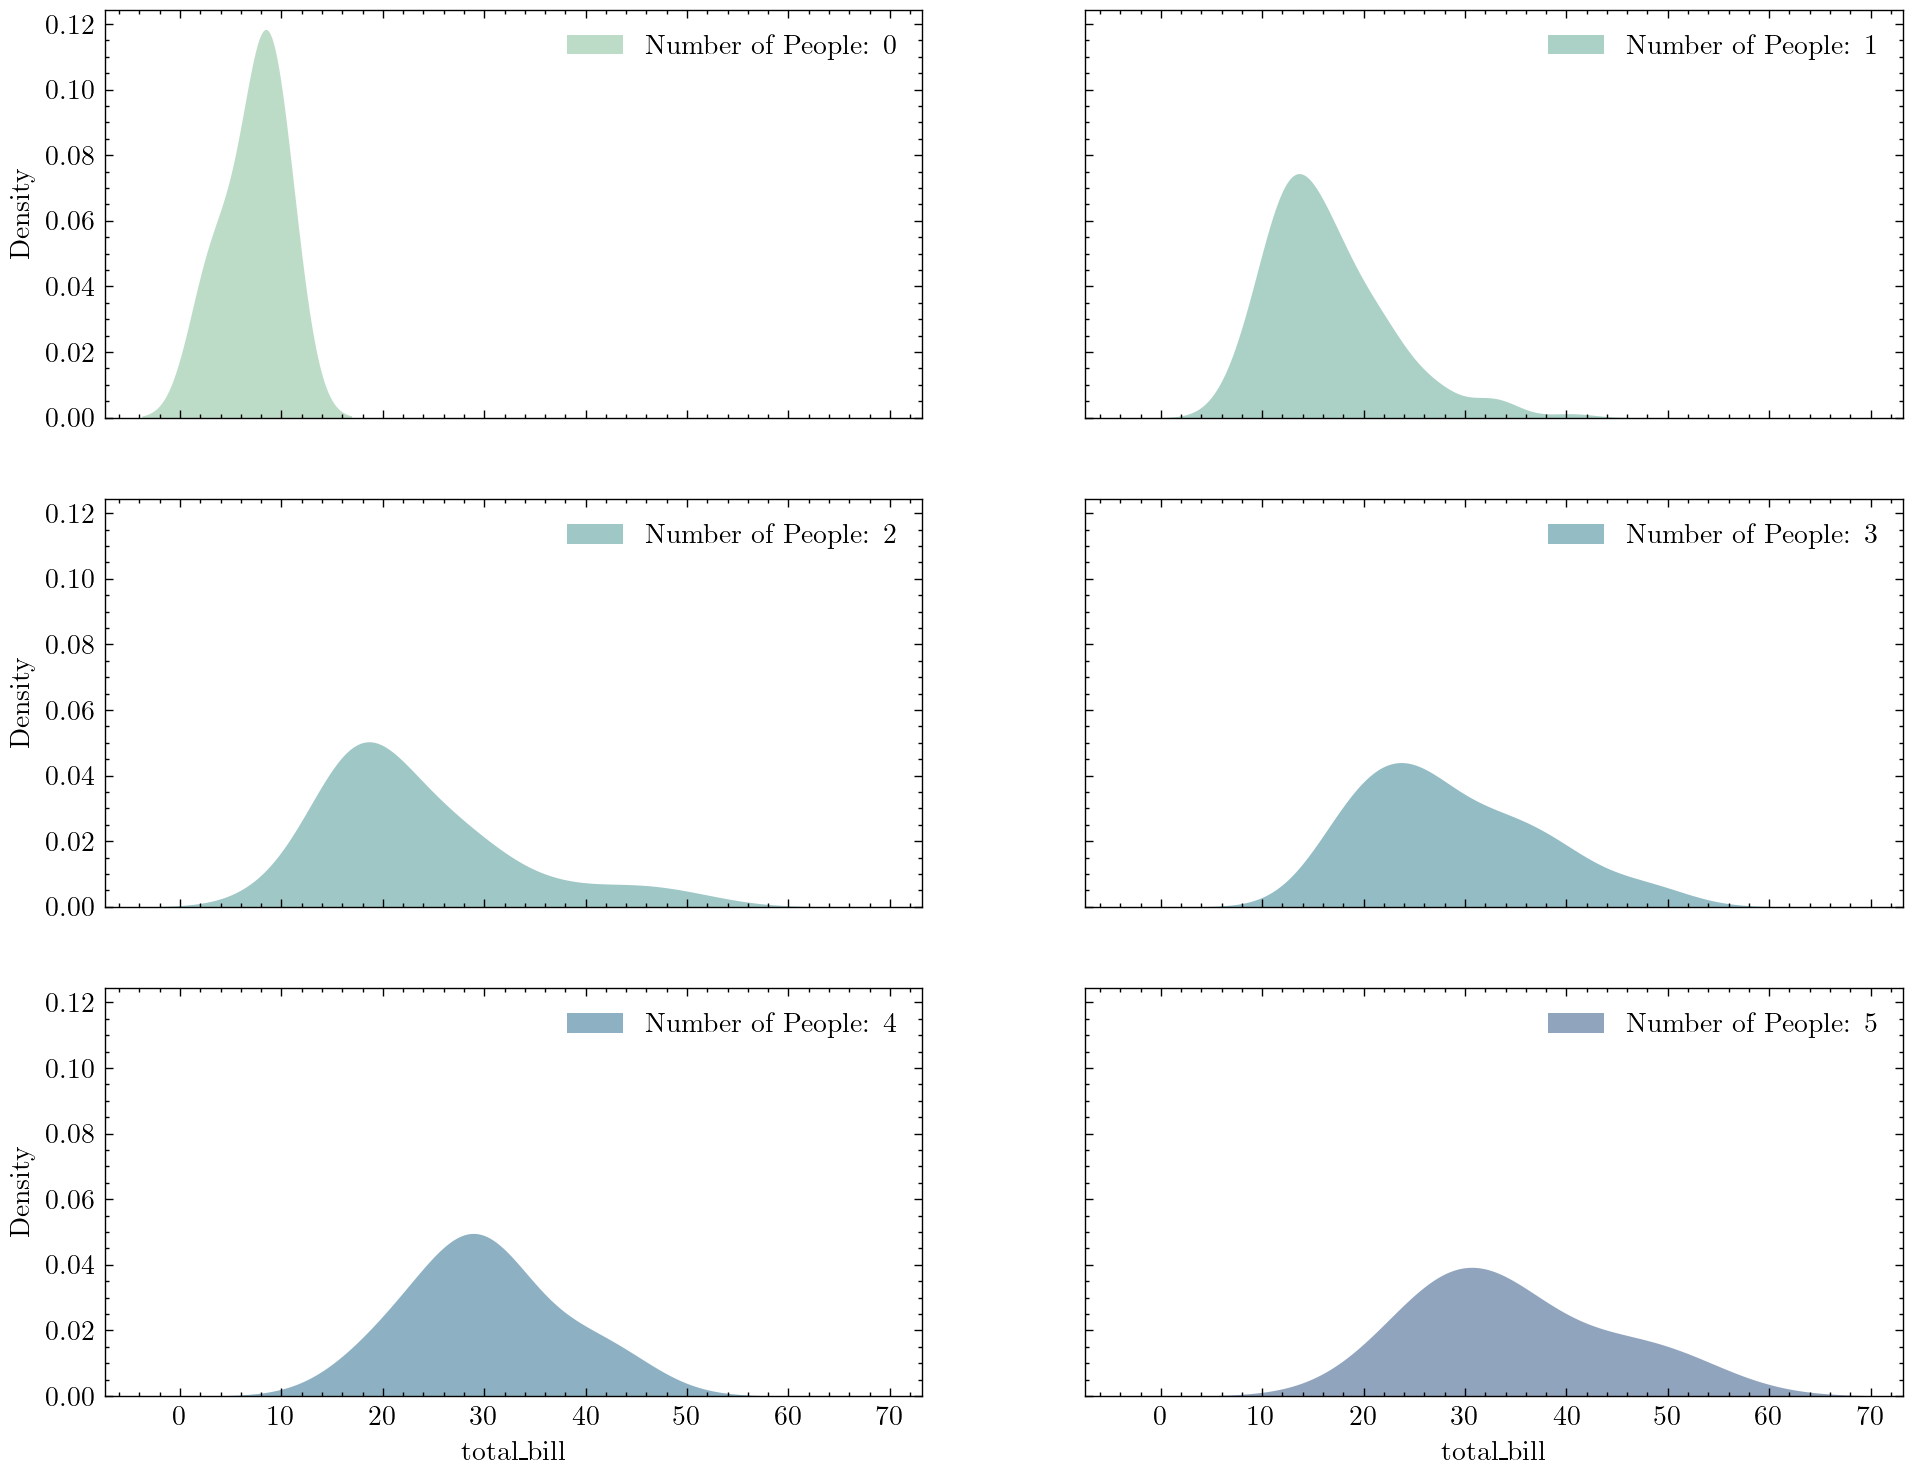

In [285]:
fig, axs = plt.subplots(3, 2, figsize=(5.8 * 2, 3 * 3), sharex=True, sharey=True)
# fig.figure(figsize=(5.8 * 2, 3 * 3))
plot_colors = sns.color_palette("crest", n_colors=6)
axs = axs.flatten()
for i in range(6):
    sns.kdeplot(
        data=tips[tips["Number of People"] == i + 1],
        x="total_bill",
        fill=True,
        common_norm=False,
        # palette="crest",
        color=plot_colors[i],
        alpha=0.5,
        linewidth=0,
        ax=axs[i]
        
    )
    axs[i].legend([f'Number of People: {i}'])

Text(0.5, 0.98, '9 random normals centered at 9 different points')

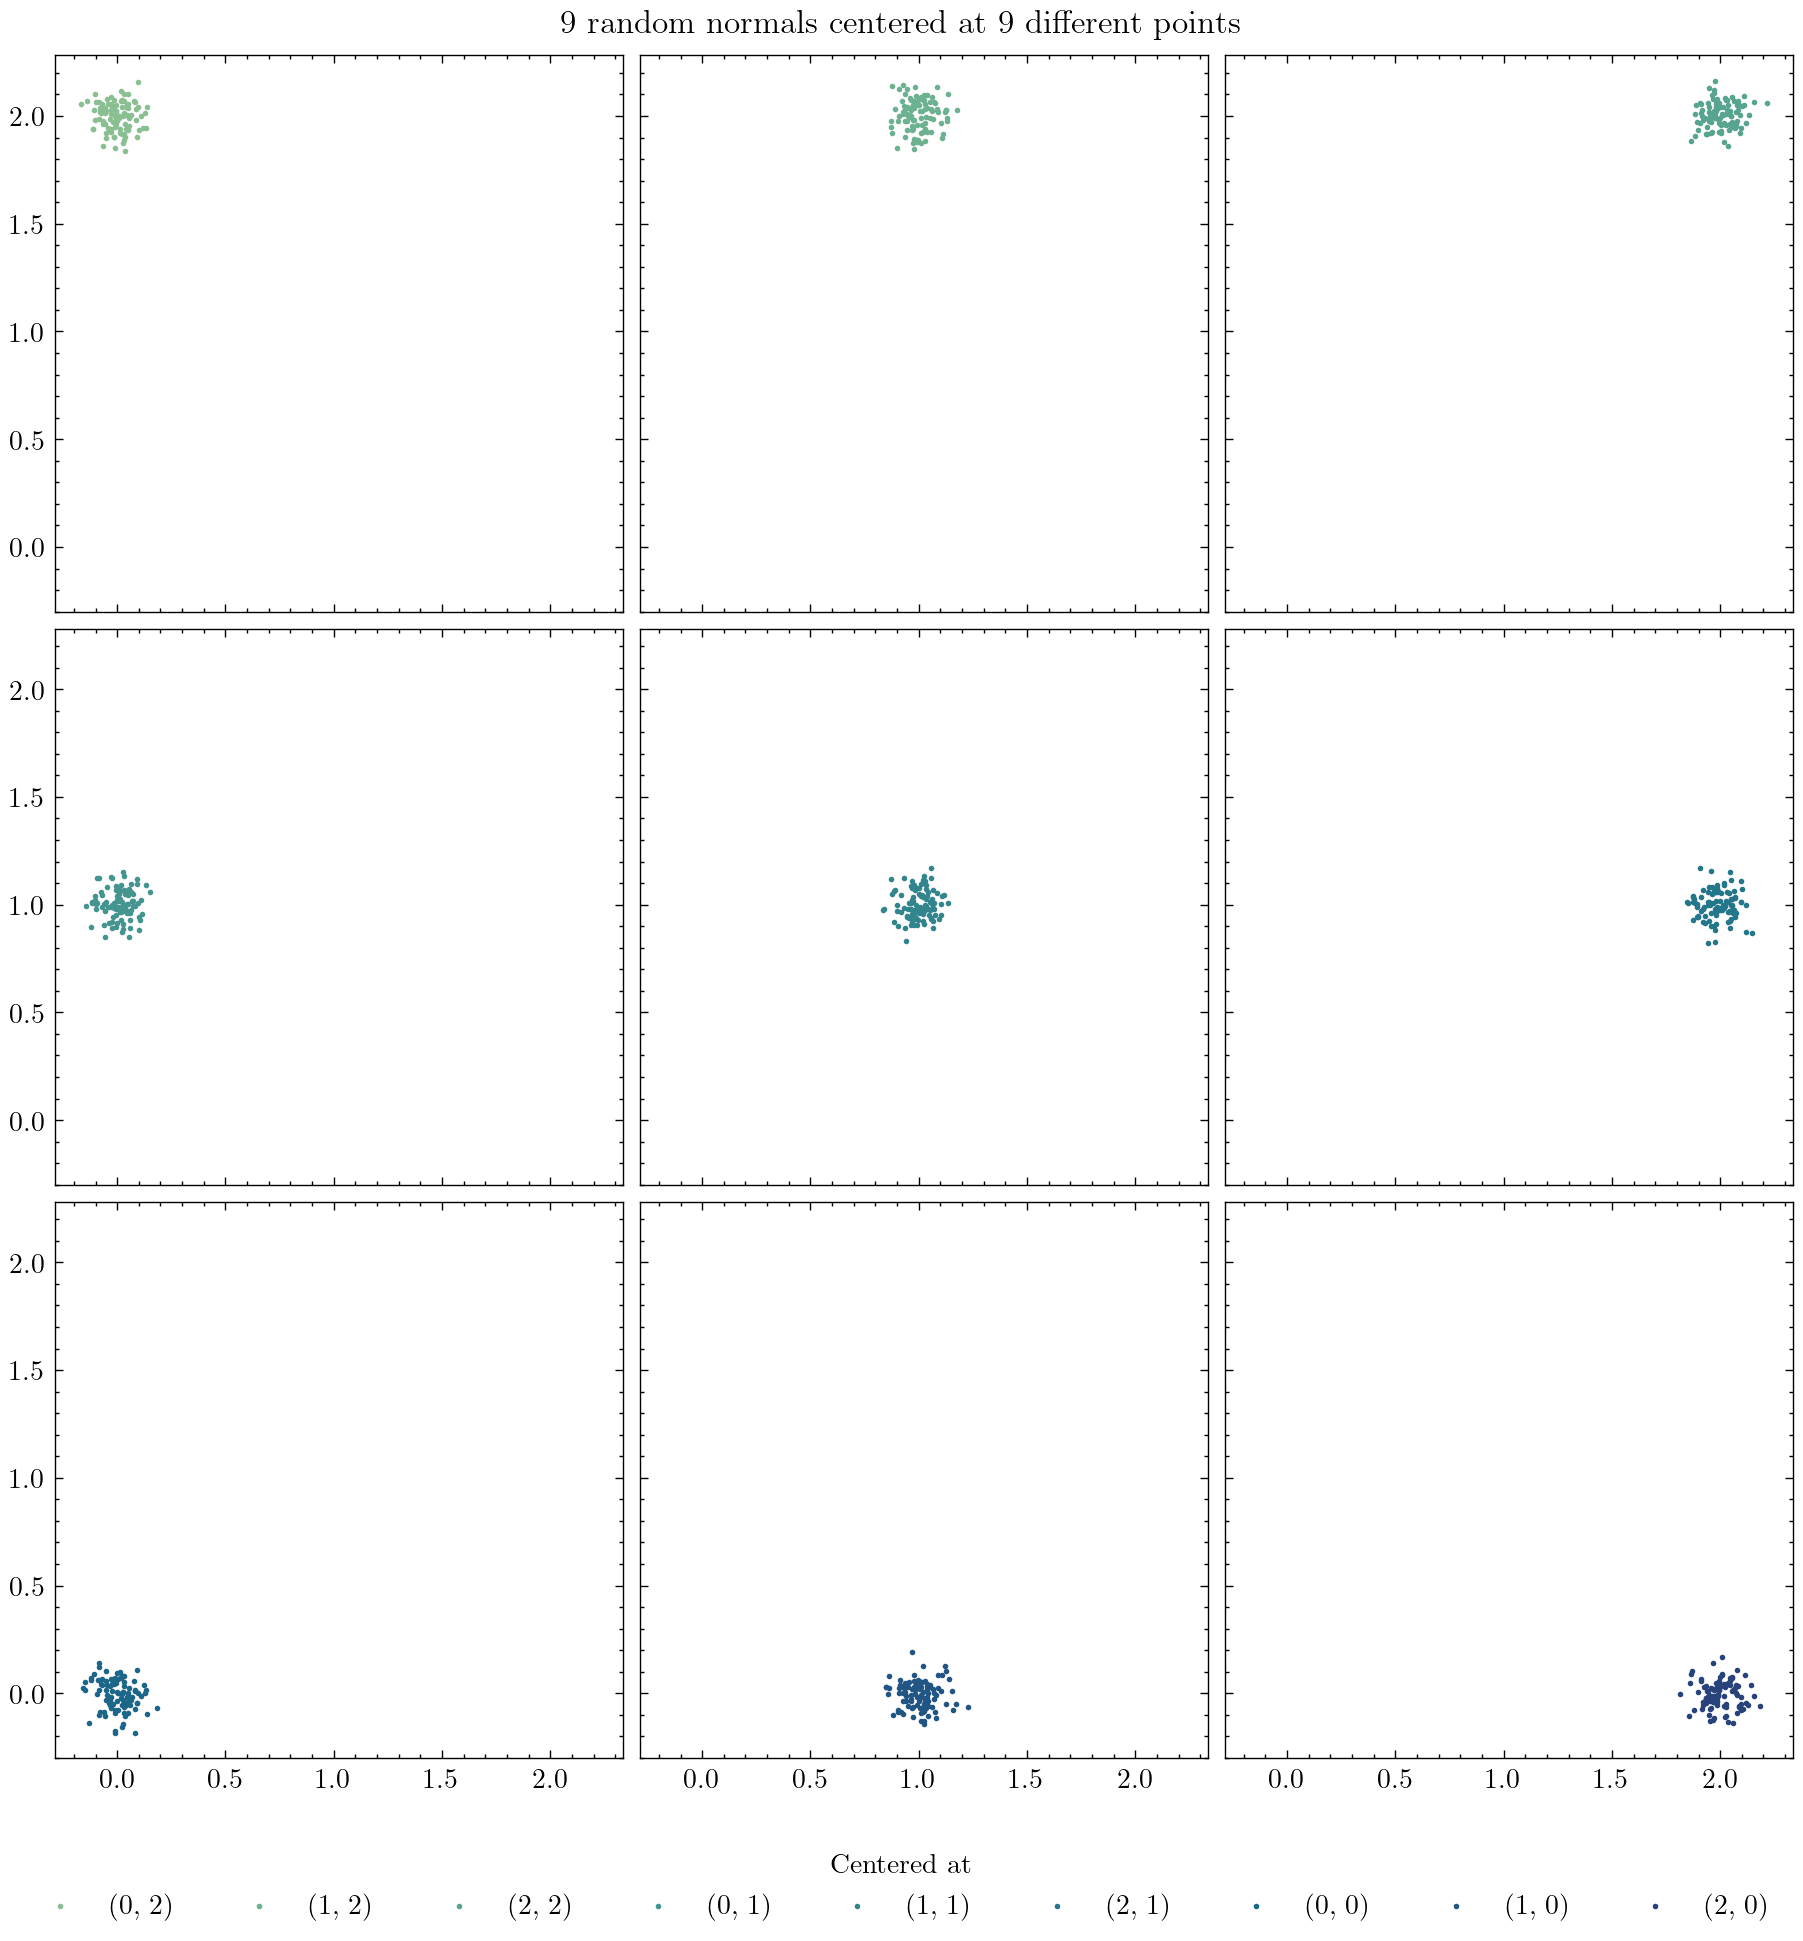

In [352]:
nrows, ncols = 3, 3
fig, axs = plt.subplots(nrows, ncols, figsize=(3 * ncols, 3 * nrows), sharex=True, sharey=True, layout="constrained")

colors = sns.color_palette("crest", n_colors=9)
for i in range(3):
    for j in range(3):
        plot(axs[i, j].scatter, np.random.randn(100) / 15 + j, np.random.randn(100) / 15 + (2 - i), color=colors[i*3 + j], label=f"{j, (2- i)}", s=1)
fig.legend(title='Centered at', loc='lower center', ncol=9, bbox_to_anchor=(0.5, -.08))
fig.suptitle("9 random normals centered at 9 different points")